# <center> Report_02</center>
# <center> Titanic(铁达尼号)</center>
* 姓名:陈蜀
* 学号:2018300478  
【注】本报告中包含的内容分布于文件夹report_02_Titanic中的`Titanic_kmeans_陈蜀.py`、`Titanic_logisticregression_陈蜀.py`、`Titanic_randomforest_陈蜀.py`、`Titanic_age and survived.py`  
生成的数据包括：`submit_data_delete NAN_kmeans.csv`、`submit_data_ave replace_kmeans.csv`、`submit_data_ave replace_logisticregression.csv`、`submit_data_ave replace_randomforest.csv`

## 一、任务介绍
1. 背景介绍
  RMS泰坦尼克号沉没是历史上最臭名昭著的沉船之一。 1912年4月15日，泰坦尼克号在她的处女航途中与冰山相撞后沉没，使2224名乘客和机组人员中的1502人丧生。 这一耸人听闻的悲剧震惊了国际社会，并引起了更完善的船舶安全规定。  
  沉船事故导致人员丧生的原因之一是没有足够的救生艇供乘客和船员使用。 尽管在下沉中幸存有一定的运气，但某些群体比其他群体更可能生存，例如妇女，儿童和上层阶级。  
  **在这项挑战中，我们要求你对可能生存的人群进行分析，尤其是使用机器学习工具来预测哪些乘客幸免于悲剧。**  
  
  
2. 使用方法：二进制分类、Python & SKLearn  
  
  
3. 数据：

|文件名|文件内容| 
| :----: | :----: |
| train.csv | 训练数据集 | 
| test.csv | 预测数据集 |
| gender_submission.csv | 提交示例 |

【注】  
* 训练集用于构建机器学习模型。训练集中包括每位乘客的结果（即基本事实）。模型需要在乘客的性别和阶级等特征的基础上建立。另：可以使用特征工程来创建新特征。  
* 测试数据集用于验证模型。测试集中没有乘客的基本情况，要求通过建立的模型对其进行预测。请预测测试数据集中每个乘客是否在泰坦尼克号沉没中幸存了下来。  
* 数据中还有一个数据文件（`gender_submission.csv`）。这个文件中包含一组假设，假定所有女性乘客都可以幸存。同时，需要提交的文件以该文件的格式为例。


4. 数据中变量名的解释

|变量名|解释| 备注 |
| :----: | :----: | :----: |
| survival | 幸存者 | 0表示否，1表示幸存 |
| pclass | 船票等级 | 1表示一等舱，2表示二等舱，3表示三等舱 |
| sex | 性别|
| age | 年龄 |
|sibsp|泰坦尼克号上的兄弟姐妹/配偶|
|parch|泰坦尼克号上的父母/孩子|
|ticket|船票编号|
|fare|船票价格|
|cabin|船舱编号|
|embarked|登船港口|C表示瑟堡，Q表示皇后镇，S表示南安普敦|

【注】可变符号：社会经济地位（SES）的代理人：1st表示高等，2nd表示中等，3rd表示低等。

5. 最终目标：利用训练集构建机器学习模型，预测测试数据集中每个乘客是否在泰坦尼克号沉没中幸存了下来。  
  
  
6. 要求：
   * 设计分类模型，执行代码
   * 思考解决某列数据丢失问题的方法
   * 如何将`pclass`、`embarked`字段转换为矢量字段


## 二、缺失数据的处理方法
1. 删除元组：也就是将存在遗漏信息属性值的对象（元组，记录）删除，从而得到一个完备的信息表。这种方法简单易行， 在对象有多个属性缺失值、被删除的含缺失值的对象与初始数据集的数据量相比非常小的情况下非常有效，类标号缺失时通常使用该方法。  
2. 数据补齐：用一定的值去填充空值，从而使信息表完备化。通常基于统计学原理， 根据初始数据集中其余对象取值的分布情况来对一个缺失值进行填充。数据挖掘中常用的有以下几种补齐方法：

|方法|特点|
| :----: | :----: | 
| 人工填写 | 该方法很费时，当数据规模很大、空值很多的时候，该方法是不可行的。 | 
| 特殊值填充|将空值作为一种特殊的属性值来处理，它不同于其他的任何属性值。可能导致严重的数据偏离，一般不推荐使用。| 
|平均值填充 | 将初始数据集中的属性分为数值属性和非数值属性来分别进行处理。如果空值是非数值型的，就根据统计学中的众数原理，用该属性在其他所有对象的取值次数最多的值(即出现频率最高的值)来补齐该缺失的属性值。|
|热卡填充（或就近补齐）|在完整数据中找到一个与它最相似的对象，然后用这个相似对象的值来进行填充。|
|K最近距离邻法|先根据欧式距离或相关分析来确定距离具有缺失数据样本最近的K个样本，将这K个值加权平均来估计该样本的缺失数据。|
|其他|还有很多|

3. 不处理：不处理显然是不合理的，数据处理时由于存在NAN会报错。


## 三、解题思路：  
  1. 了解处理数据，如：剔除无关数据，处理丢失数据。  
  2. 设计模型对数据进行预测。  
  3. 对比不同模型的优劣。   


## 四、对测试数据中乘客是否幸存进行预测
#### · 代码实现：
### （一）了解数据


#### 1. 导入需用库

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
#sklearn中相关库
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score

#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#### 2. 快速了解数据
* 显示数据

In [2]:
#确定数据文件的路径
home_path = "data"
train_path = os.path.join(home_path, "train.csv")
test_path = os.path.join(home_path, "test.csv")
submit_path = os.path.join(home_path, "gender_submission.csv")

#读取数据文件
train_dataset = pd.read_csv(train_path)
test_dataset = pd.read_csv(test_path)
submit_dataset = pd.read_csv(submit_path)

#显示数据集中的部分数据，了解数据集包含的数据内容
train_dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

`train.csv`中包含数据的情况如下：

|变量名|解释| 是否是数据预测的有效因素 |备注|
| :----: | :----: | :----: |:----: |
|PassengerId|乘客编号|否|
| Survival | 幸存者 | 否 |用于对预测数据的检验|
| Pclass | 船票等级 | <font color=red >是</font> |
|Name|姓名|否|
| Sex | 性别|<font color=red >是</font> |需要量化数据|
| Age | 年龄 |<font color=red >是</font> |
|SibSp|泰坦尼克号上的兄弟姐妹/配偶|<font color=red >是</font> |
|Parch|泰坦尼克号上的父母/孩子|<font color=red >是</font> |
|Ticket|船票编号|否|
|Fare|船票价格|<font color=red >是</font> |
|Cabin|船舱编号|<font color=red >是</font> |第一次预测可以暂不考虑，用于分析和目标问题的关系，不需要量化|
|Embarked|登船港口|否|可能有影响，但考虑到登船与沉船的时间间隔比较久，因此此处作为无影响因素|

In [3]:
train_dataset.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

mean-Survived一栏为0.383838，即有38.38%的乘客幸存；乘客(排除缺项的)的平均年龄为29.7。

In [4]:
test_dataset.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

`test.csv`比`train.csv`少了“Survival”，这正是该题所要求预测的数据。 

In [5]:
submit_dataset.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

需要通过建立模型预测出测试数据中的乘客是否幸存，并将数据保存在`gender_submission.csv.csv`中。

* 绘制直方图，仅为了直观地了解数据情况。  
但是感觉这个部分仅能交接数据，对乘客幸存情况的分析起不到太大作用。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024CEB89CB80>,
      dtype=object)

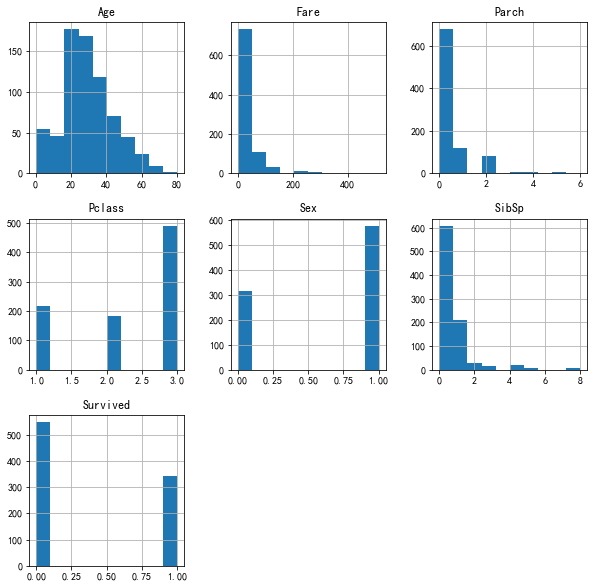

In [6]:
train_dataset.drop(["PassengerId", "Name", "Ticket", "Embarked"], axis=1, inplace=True)
train_dataset.replace("male",1,inplace=True)
train_dataset.replace("female",0,inplace=True)
train_dataset.hist(figsize=(10,10))#指定输出图片的尺寸

### （二）K-Means预测数据

In [7]:
#确定数据文件的路径
home_path = "data"
train_path = os.path.join(home_path, "train.csv")
test_path = os.path.join(home_path, "test.csv")
submit_path = os.path.join(home_path, "gender_submission.csv")

#读取数据文件
train_dataset = pd.read_csv(train_path)
test_dataset = pd.read_csv(test_path)
submit_dataset = pd.read_csv(submit_path)

#查看每列数据有多少个非空值
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


以上显示结果发现，Age为有效值，与乘客是否存活有关，但是其中存在空值。 
  
1) 处理方法1：  
* 根据前面分析，有的数据与乘客是否幸存没有关系或者关系不大，因此现剔除这些数据。剔除这些数据后，留下的数据中由部分数据（如：性别）不是数值，因此需要对其进行量化，一面将用“1”代替“male”、“0”代替“female”。此时，数据处理仍存在一点问题，在年龄一栏中，有的数据是空值，因此需要对这些数据进行处理；以下将利用~.dropna()删去空值所在行，确保数据中不存在空值而得以训练测试。  
* 此处要注意的是训练数据不仅要剔除无关因素的数据，还需要剔除已知乘客存活请款的数据。

In [9]:
#剔除与乘客是否幸存无关或关系不大的数据（按列剔除）
train_dataset.drop(["PassengerId","Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1, inplace=True)
test_dataset.drop(["PassengerId", "Name", "Cabin", "Ticket", "Embarked"], axis=1, inplace=True)

#量化“性别”，剔除空值所在行
train_dataset = train_dataset.dropna(axis=0, how='any')
test_dataset = test_dataset.dropna(axis=0, how='any')
train_dataset.replace("male",1,inplace=True)
train_dataset.replace("female",0,inplace=True)
test_dataset.replace("male",1,inplace=True)
test_dataset.replace("female",0,inplace=True)

#K-Means预测
survived_true = pd.read_csv(train_path,usecols=['Survived'])
est = KMeans(n_clusters=2, init="k-means++", n_jobs=-1)
est.fit(train_dataset, survived_true)

pred_train = est.predict(train_dataset) #训练数据的预测结果
pred_test = est.predict(test_dataset) #测试数据的预测结果

#预测后所得数据的处理
passenger = np.array(range(418))+892 #生成CaseId，方便后续和预测结果、结果概率等数据绑定后保存
passenger = pd.DataFrame(passenger,index=None,columns=['Passenger']) #把caseid由array转化为DataFrame
pred_test = pd.DataFrame(pred_test,index=None,columns=['Survived']) #把测试数据的预测结果由array转化为DataFrame
submit_data = pd.concat([passenger,pred_test],axis=1) #合并caseid和pred_test

#保存数据
submit_data.to_csv("submit_data_delete NAN_kmeans.csv", index=False)

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


将预测的结果保存在文件`submit_data_delete NAN_kmeans.csv`中。

     Passenger  Survived
0          892       0.0
1          893       0.0
2          894       0.0
3          895       0.0
4          896       0.0
..         ...       ...
413       1305       NaN
414       1306       NaN
415       1307       NaN
416       1308       NaN
417       1309       NaN

[418 rows x 2 columns]


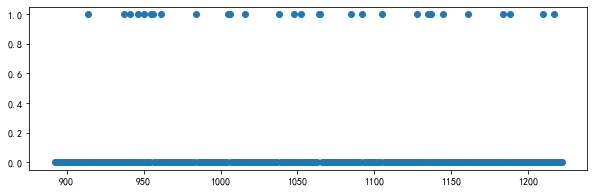

In [10]:
print(submit_data)
plt.figure(figsize=(10,3))
plt.scatter(submit_data['Passenger'],submit_data['Survived'])

输出submit_data，发现，后面部分数据是空值。  
思考原因：由于在处理数据时，将空值所在行的数据整行去除，这导致测试数据的数量少于原来给定的数量（即生成的passenger）。  
因此，直接删除空值所在行会影响最终结果，因此需要对空值赋值，以确保数据完整。  
  
2) 处理方法2：  
* 利用~.fillna()将平均年龄填充如空值位置，从而确保数据中不存在空值而得以训练测试。  

训练数据的预测正确率 = 64.42 %


D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


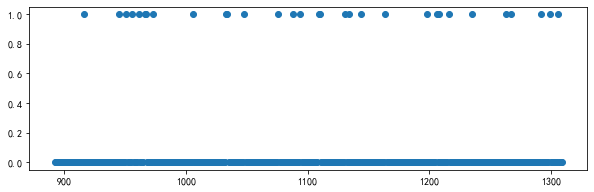

In [13]:
#确定数据文件的路径
home_path = "data"
train_path = os.path.join(home_path, "train.csv")
test_path = os.path.join(home_path, "test.csv")
submit_path = os.path.join(home_path, "gender_submission.csv")

#读取数据文件
train_dataset = pd.read_csv(train_path)
test_dataset = pd.read_csv(test_path)
submit_dataset = pd.read_csv(submit_path)

#剔除与乘客是否幸存无关或关系不大的数据（按列剔除）
train_dataset.drop(["PassengerId","Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1, inplace=True)
test_dataset.drop(["PassengerId", "Name", "Cabin", "Ticket", "Embarked"], axis=1, inplace=True)
survived_true = pd.read_csv("E:\\pyhomework\\machinelearning_homework\\report_02_Titanic\\data\\train.csv",usecols=['Survived'])

#量化“性别”，剔除空值所在行
train_dataset_pre = train_dataset.dropna(axis=0, how='any')
test_dataset_pre = test_dataset.dropna(axis=0, how='any')
train_dataset.replace("male",1,inplace=True)
train_dataset.replace("female",0,inplace=True)
test_dataset.replace("male",1,inplace=True)
test_dataset.replace("female",0,inplace=True)
ave_traindataset = sum(train_dataset_pre['Age']) / len(train_dataset_pre['Age'])
ave_testdataset = sum(test_dataset_pre['Age']) / len(test_dataset_pre['Age'])
train_dataset = train_dataset.fillna(ave_traindataset)
test_dataset = test_dataset.fillna(ave_testdataset)

#K-Means预测
survived_true = pd.read_csv(train_path,usecols=['Survived'])
est = KMeans(n_clusters=2, init="k-means++", n_jobs=-1)
est.fit(train_dataset, survived_true)

pred_train = est.predict(train_dataset) #训练数据的预测结果
pred_test = est.predict(test_dataset) #测试数据的预测结果

#预测后所得数据的处理
passenger = np.array(range(418))+892 #生成CaseId，方便后续和预测结果、结果概率等数据绑定后保存
passenger = pd.DataFrame(passenger,index=None,columns=['Passenger']) #把caseid由array转化为DataFrame
pred_test = pd.DataFrame(pred_test,index=None,columns=['Survived']) #把测试数据的预测结果由array转化为DataFrame
submit_data = pd.concat([passenger,pred_test],axis=1) #合并caseid和pred_test

#保存数据
submit_data.to_csv("submit_data_ave replace_kmeans.csv", index=False)

acc_train = accuracy_score(survived_true,pred_train)*100#准确率
print("训练数据的预测正确率 = %.2f" % acc_train,"%")

plt.figure(figsize=(10,3))
plt.scatter(submit_data['Passenger'],submit_data['Survived'])
plt.show()

将预测的结果保存在文件`submit_data_ave replace_kmeans.csv`中。  
对比上下两个预测结果可视化图，其中1的分布较为相似，因此，用平均值填充年龄空值不会使数据大规模变化，从而影响数据预测。观察1的分布而不观察0，是因为遇难的人数过多，点与点之间的距离过小，几乎连在一起，因此难以得出结论。  
但是计算得到的预测正确率仍较低，因此，需要考虑其他模型。

### （三）Logistic Regression预测数据
在Report01中，发现Logistic Regression虽不是正确率最高的预测方法，但是它可以较快得到结果，因此，现先使用Logistic Regression进行预测。  
将预测的结果保存在文件`submit_data_ave replace_logisticregression.csv`中。

In [14]:
#导入需用库
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
#sklearn中相关库
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc,precision_recall_curve,average_precision_score

#plot中显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#确定数据文件的路径
home_path = "data"
train_path = os.path.join(home_path, "train.csv")
test_path = os.path.join(home_path, "test.csv")
submit_path = os.path.join(home_path, "gender_submission.csv")

#读取数据文件
train_dataset = pd.read_csv(train_path)
test_dataset = pd.read_csv(test_path)
submit_dataset = pd.read_csv(submit_path)

#剔除与乘客是否幸存无关或关系不大的数据（按列剔除）
train_dataset.drop(["PassengerId","Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1, inplace=True)
test_dataset.drop(["PassengerId", "Name", "Cabin", "Ticket", "Embarked"], axis=1, inplace=True)
survived_true = pd.read_csv("E:\\pyhomework\\machinelearning_homework\\report_02_Titanic\\data\\train.csv",usecols=['Survived'])

#量化“性别”，剔除空值所在行
train_dataset_pre = train_dataset.dropna(axis=0, how='any')
test_dataset_pre = test_dataset.dropna(axis=0, how='any')
train_dataset.replace("male",1,inplace=True)
train_dataset.replace("female",0,inplace=True)
test_dataset.replace("male",1,inplace=True)
test_dataset.replace("female",0,inplace=True)
ave_traindataset = sum(train_dataset_pre['Age']) / len(train_dataset_pre['Age'])
ave_testdataset = sum(test_dataset_pre['Age']) / len(test_dataset_pre['Age'])
train_dataset = train_dataset.fillna(ave_traindataset)
test_dataset = test_dataset.fillna(ave_testdataset)

#Logistic Regression预测
survived_true = pd.read_csv(train_path,usecols=['Survived'])
lr = LogisticRegression()
lr.fit(train_dataset, survived_true)

pred_train = lr.predict(train_dataset) #训练数据的预测结果
pred_test = lr.predict(test_dataset) #测试数据的预测结果

#预测后所得数据的处理
passenger = np.array(range(418))+892 #生成CaseId，方便后续和预测结果、结果概率等数据绑定后保存
passenger = pd.DataFrame(passenger,index=None,columns=['Passenger']) #把caseid由array转化为DataFrame
pred_test = pd.DataFrame(pred_test,index=None,columns=['Survived']) #把测试数据的预测结果由array转化为DataFrame
submit_data = pd.concat([passenger,pred_test],axis=1) #合并caseid和pred_test

#保存数据
submit_data.to_csv("submit_data_ave replace_logisticregression.csv", index=False)

acc_train = accuracy_score(survived_true,pred_train)*100#准确率
print("训练数据的预测正确率 = %.2f" % acc_train,"%")

训练数据的预测正确率 = 79.80 %


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### （四）Random Forest预测数据
将预测的结果保存在文件`submit_data_ave replace_randomforest.csv`中。

In [15]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
#sklearn中相关库
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc,precision_recall_curve,average_precision_score

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#确定数据文件的路径
home_path = "data"
train_path = os.path.join(home_path, "train.csv")
test_path = os.path.join(home_path, "test.csv")
submit_path = os.path.join(home_path, "gender_submission.csv")

#读取数据文件
train_dataset = pd.read_csv(train_path)
test_dataset = pd.read_csv(test_path)
submit_dataset = pd.read_csv(submit_path)

#剔除与乘客是否幸存无关或关系不大的数据（按列剔除）
train_dataset.drop(["PassengerId","Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1, inplace=True)
test_dataset.drop(["PassengerId", "Name", "Cabin", "Ticket", "Embarked"], axis=1, inplace=True)
survived_true = pd.read_csv("E:\\pyhomework\\machinelearning_homework\\report_02_Titanic\\data\\train.csv",usecols=['Survived'])

#量化“性别”，剔除空值所在行
train_dataset_pre = train_dataset.dropna(axis=0, how='any')
test_dataset_pre = test_dataset.dropna(axis=0, how='any')
train_dataset.replace("male",1,inplace=True)
train_dataset.replace("female",0,inplace=True)
test_dataset.replace("male",1,inplace=True)
test_dataset.replace("female",0,inplace=True)
ave_traindataset = sum(train_dataset_pre['Age']) / len(train_dataset_pre['Age'])
ave_testdataset = sum(test_dataset_pre['Age']) / len(test_dataset_pre['Age'])
train_dataset = train_dataset.fillna(ave_traindataset)
test_dataset = test_dataset.fillna(ave_testdataset)

#Random Forest预测
survived_true = pd.read_csv(train_path,usecols=['Survived'])
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(train_dataset, survived_true)

pred_train = clf.predict(train_dataset) #训练数据的预测结果
pred_test = clf.predict(test_dataset) #测试数据的预测结果

#预测后所得数据的处理
passenger = np.array(range(418))+892 #生成CaseId，方便后续和预测结果、结果概率等数据绑定后保存
passenger = pd.DataFrame(passenger,index=None,columns=['Passenger']) #把caseid由array转化为DataFrame
pred_test = pd.DataFrame(pred_test,index=None,columns=['Survived']) #把测试数据的预测结果由array转化为DataFrame
submit_data = pd.concat([passenger,pred_test],axis=1) #合并caseid和pred_test

#保存数据
submit_data.to_csv("submit_data_ave replace_randomforest.csv", index=False)

acc_train = accuracy_score(survived_true,pred_train)*100#准确率
print("训练数据的预测正确率 = %.2f" % acc_train,"%")

<ipython-input-15-6f91f16a038a>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_dataset, survived_true)


训练数据的预测正确率 = 98.20 %


**这里得到了和 Report-01 相同的结论，随机森林的预测结果是最佳的。**

## 五、分析主要因素对乘客幸存与否的关系

接下来考察几个主要因素与乘客幸存与否的关系，主要通过计算其相关系数和协方差来判定它们的相关性。

In [16]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
#sklearn中相关库
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc,precision_recall_curve,average_precision_score

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#确定数据文件的路径
home_path = "data"
train_path = os.path.join(home_path, "train.csv")

#读取数据文件
train_dataset = pd.read_csv(train_path)

#显示数据集中的部分数据，了解数据集包含的数据内容
train_dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### 1. 分析性别和是否幸存的关系

In [17]:
#读取“Survived”和“Sex”两列数据
survived_and_sex = pd.read_csv("E:\\pyhomework\\machinelearning_homework\\report_02_Titanic\\data\\train.csv",usecols=['Survived','Sex'])

#将性别量化
survived_and_sex.replace("male",0,inplace=True) #0表示男性
survived_and_sex.replace("female",1,inplace=True) #1表示女性

survived_and_sex

Survived  Sex
0           0    0
1           1    1
2           1    1
3           1    1
4           0    0
..        ...  ...
886         0    0
887         1    1
888         0    1
889         1    0
890         0    0

[891 rows x 2 columns]

In [18]:
#计算协方差
survived_and_sex.Survived.cov(survived_and_sex.Sex)

0.12637612075814325

In [19]:
#计算相关系数
survived_and_sex.Survived.corr(survived_and_sex.Sex)

0.543351380657755

相关系数和相关性大小的判定如下：

|相关系数>0|相关系数<0|
|:----:|:----:|
|正相关|负相关|

|相关系数的绝对值|两组数据的相关性|
|:----:|:----:|
|0~0.09|不相关|
|0.09~0.3|弱相关|
|0.3~0.5|中等相关|
|0.5~1.0|强相关|

* 因此得出结论：`train.csv`文件中，乘客是否幸存与乘客的性别强相关，说明该文件中的数据符合铁达尼号沉船时先救女性的报道。
【注】若用“1”表示男性，用“0”表示女性，则计算出的相关系数为负。因为在“Survived”一栏中，“0”表示“遇难”，“1”表示“幸存”。

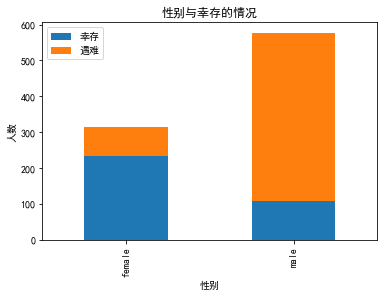

In [20]:
#画图观察性别与幸存的关系
Survived_0 = train_dataset.Sex[train_dataset.Survived == 0].value_counts()
Survived_1 = train_dataset.Sex[train_dataset.Survived == 1].value_counts()
df=pd.DataFrame({'幸存':Survived_1, '遇难':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("性别与幸存的情况")
plt.xlabel("性别") 
plt.ylabel("人数") 
plt.show()

#### 2. 分析船票等级与是否幸存的关系

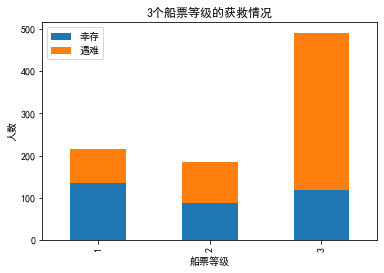

In [21]:
#画图显示船票等级与幸存的关系
Survived_0 = train_dataset.Pclass[train_dataset.Survived == 0].value_counts()
Survived_1 = train_dataset.Pclass[train_dataset.Survived == 1].value_counts()
df=pd.DataFrame({'幸存':Survived_1, '遇难':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("3个船票等级的获救情况")
plt.xlabel("船票等级") 
plt.ylabel("人数") 
plt.show()

根据上方的直方图可以知道，船票等级(Pclass)越高，幸存的可能性越大，即乘客时候优先逃生与阶级有一定关系

In [75]:
#计算相关系数
train_dataset.Survived.corr(train_dataset.Pclass)

-0.33848103596101475

船票等级的数字越小，表示等级越高，因此计算出的相关系数为负。  
从相关系数来看，船票等级与是否幸存的关系不如性别与是否幸存的关系紧密。

#### 3. 船票等级和性别两个因素综合可视化

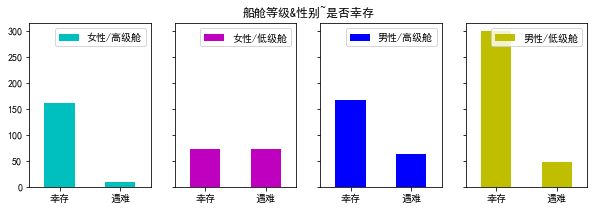

In [22]:
fig=plt.figure(figsize=(10,3))
plt.axis('off') #关闭坐标轴显示，如果没有关闭，会和标签重叠，影响美观
plt.title("船舱等级&性别~是否幸存")
 
ax1=fig.add_subplot(141)
train_dataset.Survived[train_dataset.Sex == 'female'][train_dataset.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='c')
ax1.set_xticklabels(["幸存", "遇难"], rotation=0)
ax1.legend(["女性/高级舱"])#, loc='best'
 
ax2=fig.add_subplot(142, sharey=ax1)
train_dataset.Survived[train_dataset.Sex == 'female'][train_dataset.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='m')
ax2.set_xticklabels(["幸存", "遇难"], rotation=0)
plt.legend(["女性/低级舱"])
 
ax3=fig.add_subplot(143, sharey=ax1)
train_dataset.Survived[train_dataset.Sex == 'male'][train_dataset.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='blue')
ax3.set_xticklabels(["幸存", "遇难"], rotation=0)
plt.legend(["男性/高级舱"])
 
ax4=fig.add_subplot(144, sharey=ax1)
train_dataset.Survived[train_dataset.Sex == 'male'][train_dataset.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='y')
ax4.set_xticklabels(["幸存", "遇难"], rotation=0)
plt.legend(["男性/低级舱"])

plt.show()

#### 4. 分析年龄和是否幸存的关系

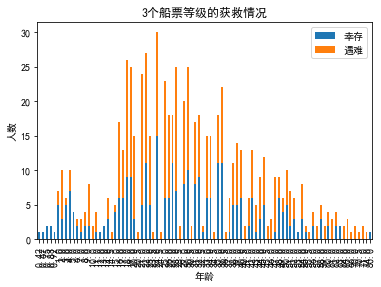

In [23]:
#画图显示船票等级与幸存的关系
Survived_0 = train_dataset.Age[train_dataset.Survived == 0].value_counts()
Survived_1 = train_dataset.Age[train_dataset.Survived == 1].value_counts()
df=pd.DataFrame({'幸存':Survived_1, '遇难':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("3个船票等级的获救情况")
plt.xlabel("年龄") 
plt.ylabel("人数") 
plt.show()

notebook显示，画出来的图横坐标都挤在一起了，实在没法看。不过可以观察大体趋势。  
所以我把代码用VScode运行(文件名为`Titanic_age and survived.py`)，然后放大图观察。图如下（即report_02_Titanic中的`image_Titanic_age and survived.png`）：
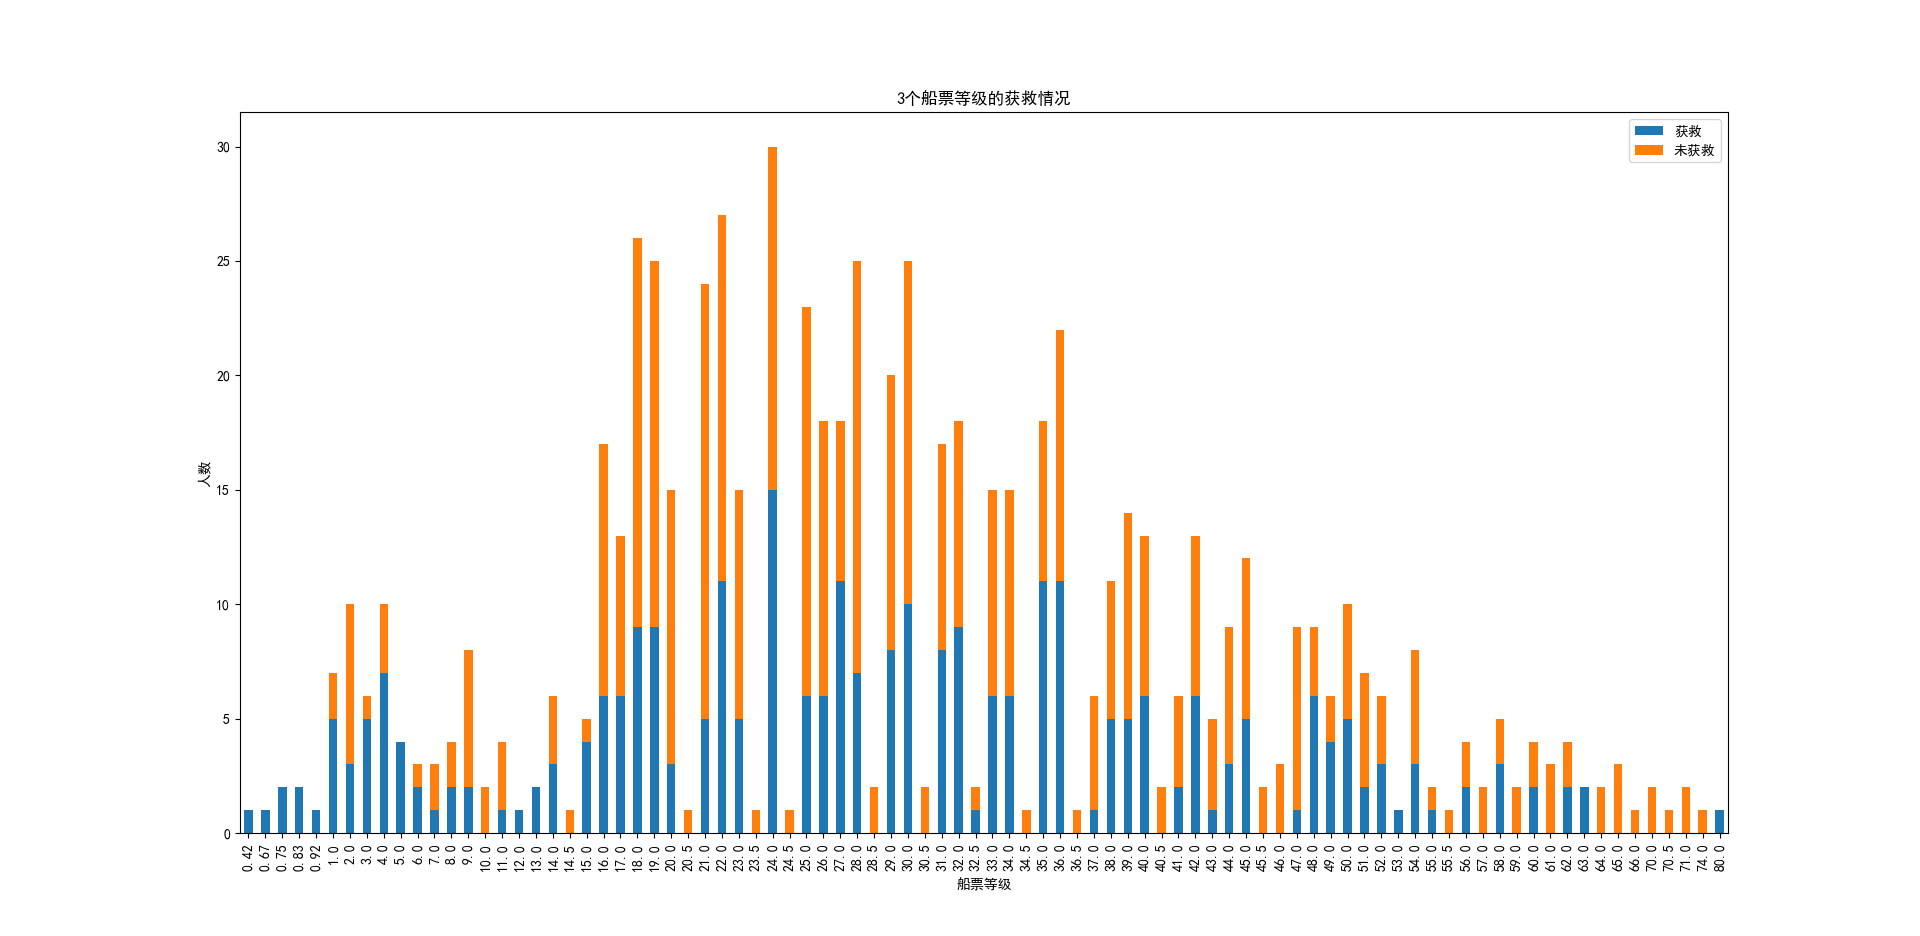
从图中可以看出，年龄比较小的幸存比例相对还是比较高的。

#### 5. 分析船舱和是否幸存的关系

In [24]:
#train_dataset_pre = train_dataset.dropna(axis=0, how='any')
#train_dataset_pre.Cabin
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin一项，仅有204个数据，有687个空值。在前面的预测中，是将Cabin这一项删除了。  
因为缺少太多数据，补全数据不可取，删除空值也不可取。  
这里可以将Cabin分为两类，一类是有Cabin值得，一类是空值。  
P.S.这是同学告诉我的，要不然我就觉得这个Cabin很奇怪，但实在不知道怎么处理这些值。  
  
接下来**考虑有无Cabin与是否幸存的关系。**

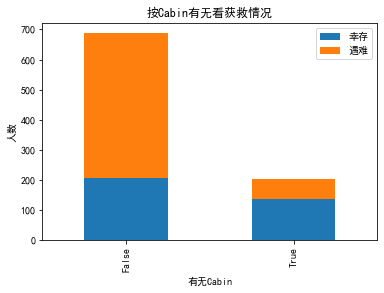

In [25]:
Survived_0 = pd.notnull(train_dataset.Cabin)[train_dataset.Survived==0].value_counts()
Survived_1 = pd.notnull(train_dataset.Cabin)[train_dataset.Survived==1].value_counts()
df=pd.DataFrame({'幸存':Survived_1, '遇难':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("按Cabin有无看获救情况")
plt.xlabel("有无Cabin") 
plt.ylabel("人数")
plt.show()

有船舱编号的幸存比例比没有船舱的要大得多，因此推断是否有船舱编号与是否幸存有一定关系。但该推断没有充足的理由。

## 五、总结
1. 错误——SyntaxError: invalid character in identifier
   代码中可能夹杂有中文符号，经检查发现，有一个逗号是中文符号，对比一下“，”“,”。

2. `train_dataset.drop("PassengerId", "Name", "Ticket", "Embarked", axis=1, inplace=True)`  
   TypeError: drop() got multiple values for argument 'axis'  
   正确语句：`train_dataset.drop(["PassengerId", "Name", "Ticket", "Embarked"], axis=1, inplace=True)`
  
3. 上一次完成Report-01时没什么经验，看数据是直接打开csv文件看的。这一次参考了`data_tutorial.ipynb`，直接通过代码获得数据，并对数据进行简单的分析，以了解数据的特征。

4. 完成本次报告后不难发现，利用直方图对数据相关性进行分析十分直观，可以快速获得两列数据的大致相关关系。  

5. **其实对于年龄的预测，使用平均值填充并不是最好的方法，因为没有充分的理由支撑该处理方式。我刚刚想到，其实更理想的解决方法是重新建立一个*年龄预测模型*，对确实的年龄数据进行预测。若使用该方法，则需要分析筛选出于年龄相关的数据，对不缺失年龄数据的乘客数据进行训练测试，进而对缺失的年龄数据进行预测。这个模型不同于预测是否幸存的模型区别在于，年龄有很多，不仅仅是0和1。**  
（想到这个年龄预测方法，将它写下来时，距离我完成这份报告以及过去有点久了，我认为用平均值填充缺失数据可以接受，且若采用新方法重新做题工作量太大了，因此我只写下了思路。）
